In [3]:
#Import all needed libraries
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Extract the .h5 file
f1 = h5py.File('/content/sample_data/train_catvnoncat.h5', 'r')
f2 = h5py.File('/content/sample_data/test_catvnoncat.h5', 'r')

1


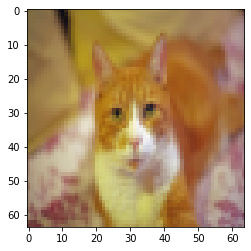

In [5]:
#Train dataset
x_train = np.int32(f1['train_set_x'][:])
y_train = np.int32(f1['train_set_y'][:])
plt.imshow(x_train[24])
print(y_train[24])

1


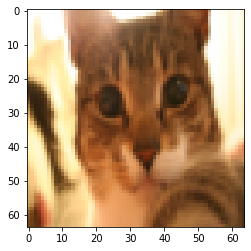

In [6]:
#test dataset
x_test = np.int32(f2['test_set_x'][:])
y_test = np.int32(f2['test_set_y'][:])
plt.imshow(x_test[11])
print(y_test[11])

In [7]:
#Normalize dataset
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
#Flatten the image
def Flatten(image):
  flatten = image.reshape(image.shape[1]*image.shape[2]*image.shape[3],image.shape[0])
  return flatten

In [9]:
#Flatten Train dataset
train_flatten = Flatten(x_train)

#Flatten Test dataset
test_flatten = Flatten(x_test)

In [10]:
#shapes of train and test flatten data
print(train_flatten.shape)
print(test_flatten.shape)

(12288, 209)
(12288, 50)


In [11]:
#Sigmoid Function
def sigmoid(x):
  activation = 1/(1 + np.exp(-x))
  return activation

In [12]:
act = sigmoid(np.array([[1,2],[3,4]]))
print(act)

[[0.73105858 0.88079708]
 [0.95257413 0.98201379]]


In [13]:
#Binary Cross Entropy
def BinaryCrossEntropy(train_dataset, y, activation):
  eq = (y*(np.log(activation)) + (1-y)*(np.log(1-activation)));
  sum = np.sum(eq)
  loss = -(sum)/train_dataset
  return loss

In [14]:
BinaryCrossEntropy(100, 3, act)

-0.19493073021947258

In [15]:
#Initialize Parameters
def parameters(dimensions):

  w1 = np.zeros((dimensions,4));           #4 neurons in first hidden layer
  b1 = np.zeros((4,1));                    #4 neurons in 1st and 3 neurons in 2nd hidden layer

  w2 = np.zeros((4,3));
  b2 = np.zeros((3,1));

  w3 = np.zeros((3,1));
  b3 = 0;

  prm = {"w1":w1, "w2":w2, "w3":w3, "b1":b1, "b2":b2, "b3":b3}

  return prm

In [16]:
prm = parameters(4)

In [17]:
#RELU Function
def RELU(X):
   return np.maximum(0,X)

In [18]:
act = RELU(np.array([[1,-2],[-4,6]]))
print(act)

[[1 0]
 [0 6]]


In [19]:
#Backward RELU Function
def Backward_RELU(X):

  arr = np.zeros(X.shape);
  arr[X > 0] = 1 
  return arr

In [20]:
Backward_RELU(np.array([[1,-2],[-4,6]]))

array([[1., 0.],
       [0., 1.]])

In [21]:
#Forward & Backward Propagation
def Forward_Backward_Propagation(prm, labels, inputs, training_dataset):

  #parameters for 1st layer
  w1 = prm['w1']
  b1 = prm['b1']
  #parameters for 2nd layer
  w2 = prm['w2']
  b2 = prm['b2']
  #parameters for 3rd layer
  w3 = prm['w3']
  b3 = prm['b3']

  #forward propagation
  Z1 = np.dot(w1.T, inputs) + b1               #First Layer
  A1 = RELU(Z1)

  Z2 = np.dot(w2.T, A1) + b2                   #Second Layer
  A2 = RELU(Z2)

  Z3 = np.dot(w3.T, A2) + b3                   #Third Layer
  A3 = sigmoid(Z3)
  
  #Loss
  L = BinaryCrossEntropy(training_dataset, labels, A3)                

  #backward propagation                                                             
  dw1 = (1/training_dataset)*(np.dot(np.dot(inputs, np.dot(np.dot(np.dot((A3-labels).T, w3.T), Backward_RELU(Z2)), Backward_RELU(Z1).T)), np.sum(w2.T)))
  db1 = (1/training_dataset)*(np.dot(np.dot(np.dot(np.dot((A3-labels).reshape((1,209)), Backward_RELU(Z2).T), np.sum(w3.T)), np.sum(Backward_RELU(Z1).T)), w2.T).T)
  dw2 = (1/training_dataset)*(np.dot(np.dot(np.dot(A1, (A3-labels).T), w3.T), np.sum(Backward_RELU(Z2))))
  db2 = (1/training_dataset)*(np.dot(np.dot(Backward_RELU(Z2), (A3-labels).T), np.sum(w3.T)))
  dw3 = (1/training_dataset)*(np.dot(A2, (A3-labels).T))
  db3 = (1/training_dataset)*(np.sum(A3-labels))

  derivatives = {"dw1":dw1, "dw2":dw2, "dw3":dw3, "db1":db1, "db2":db2, "db3":db3}

  return derivatives, L

In [22]:
#Optimizers Update Parameters
def Gradient_Descent(prm, labels, inputs, training_dataset, lr, epochs):

  costs = []

  for i in range(epochs):

    derivatives, loss = Forward_Backward_Propagation(prm, labels, inputs, training_dataset)
    dw1 = derivatives["dw1"]
    db1 = derivatives["db1"]
    dw2 = derivatives["dw2"]
    db2 = derivatives["db2"]
    dw3 = derivatives["dw3"]
    db3 = derivatives["db3"]

    w1 = prm['w1']
    b1 = prm['b1']
    w2 = prm['w2']
    b2 = prm['b2']
    w3 = prm['w3']
    b3 = prm['b3']

    #update parameters
    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    w2 = w2 - lr*dw2
    b2 = b2 - lr*db2
    w3 = w3 - lr*dw3
    b3 = b3 - lr*db3

    prm = {"w1":w1, "w2":w2, "w3":w3, "b1":b1, "b2":b2, "b3":b3}

    costs.append(loss)

    if(i%100 == 0):
      print("Cost after "+str(i)+" iteration is "+str(loss))

  parameters = {"w1":w1, "w2":w2, "w3":w3, "b1":b1, "b2":b2, "b3":b3}
  gradient_des = {"dw1":dw1, "dw2":dw2, "dw3":dw3, "db1":db1, "db2":db2, "db3":db3}

  return parameters, gradient_des, costs

In [23]:
#Finally Run the Model
def Model(dimensions, labels, training_dataset, lr, epochs, inputs):

  prm = parameters(dimensions)

  parameter, gradient_des, costs = Gradient_Descent(prm, labels, inputs, training_dataset, lr, epochs)

  return parameter, gradient_des, costs

In [24]:
dim = train_flatten.shape[0]
dataset1 = train_flatten.shape[1]
params, derivatives, costs = Model(dim, y_train, dataset1, 0.001, 1000, train_flatten)

Cost after 0 iteration is 0.6931471805599453
Cost after 100 iteration is 0.6907882504313714
Cost after 200 iteration is 0.6885443731289871
Cost after 300 iteration is 0.6864099190313003
Cost after 400 iteration is 0.6843795243136164
Cost after 500 iteration is 0.6824480801632751
Cost after 600 iteration is 0.6806107221886513
Cost after 700 iteration is 0.6788628200534734
Cost after 800 iteration is 0.6771999673621575
Cost after 900 iteration is 0.6756179718166626


In [25]:
#Prediction on dataset
def Prediction(params, td):

  w1 = params['w1']
  b1 = params['b1']
  w2 = params['w2']
  b2 = params['b2']
  w3 = params['w3']
  b3 = params['b3']
  
  Results = np.zeros((1,td.shape[1]))
    
  Z1 = np.dot(w1.T, td) + b1               
  A1 = RELU(Z1)
  Z2 = np.dot(w2.T, A1) + b2                   
  A2 = RELU(Z2)
  Z3 = np.dot(w3.T, A2) + b3                   
  A3 = sigmoid(Z3) 
    
  for i in range(A3.shape[1]):
    if A3[0,i] > 0.5:
      Results[0][i] = 1
    else:
      Results[0][i] = 0
      
  return Results, A3

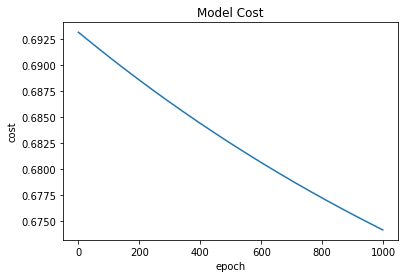

In [28]:
plt.plot(costs)
plt.title('Model Cost')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.show()